# Exploring the __GAMA__ spectroscopic catalog
notebook by _Alex Malz (GCCL@RUB)_, _Kara Ponder (UC Berkeley)_, (add your name here)

In [1]:
from astropy.io import fits
import corner
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import urllib.request as ur

import sncosmo

%matplotlib inline

We want to get the spectra of galaxies matching conditions found [here](http://www.gama-survey.org/dr3/schema/table.php?id=31), specifically sorting them by redshift and redshift quality as well as field, since we probably only want to get environment statistics for subsets by location.

In [2]:
with fits.open('SpecObj.fits') as hdul:
    hdul.info()
#     print(hdul[1].header)
    df = pd.DataFrame(np.array(hdul[1].data).byteswap().newbyteorder())
    print(df.columns)
    df.index = df['CATAID']

Filename: SpecObj.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (3919,)   uint8   
  1  SpecObj       1 BinTableHDU    106   160026R x 19C   [J, 23A, I, I, I, E, 33A, 9A, I, D, D, E, D, E, I, E, 67A, 88A, 92A]   
Index(['CATAID', 'GAMA_NAME', 'IC_FLAG', 'N_SPEC', 'N_GAMA_SPEC', 'DIST',
       'SPECID', 'SURVEY', 'SURVEY_CODE', 'RA', 'DEC', 'WMIN', 'WMAX', 'Z',
       'NQ', 'PROB', 'FILENAME', 'URL', 'URL_IMG'],
      dtype='object')


Text(0.5, 0, 'redshift')

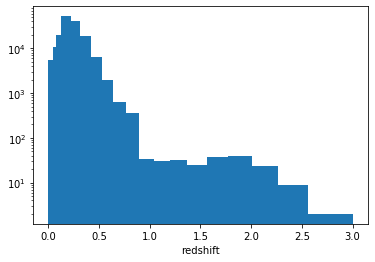

In [3]:
plt.hist(df['Z'], bins=[0., 0.042, 0.080, 0.130, 0.221, 0.317, 0.418, 0.525, 
                        0.640, 0.764, 0.897, 1.041, 1.199, 1.372, 1.562, 1.772, 
                        2.007, 2.269, 2.565, 2.899, 3.])
plt.semilogy()
plt.xlabel('redshift')

Text(0.5, 1.0, 'redshift distributions by quality flag "NQ"')

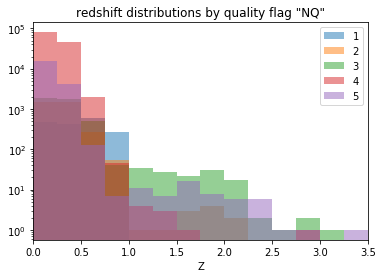

In [4]:
for i in range(5):
    quality = df.loc[df['NQ'] == i+1, 'Z']
    plt.hist(quality, alpha=0.5, label=str(i+1), bins=np.linspace(0, 3.5, 15))
plt.legend(loc='upper right')
plt.semilogy()
plt.xlim(0., 3.5)
plt.xlabel('Z')
plt.title('redshift distributions by quality flag "NQ"')

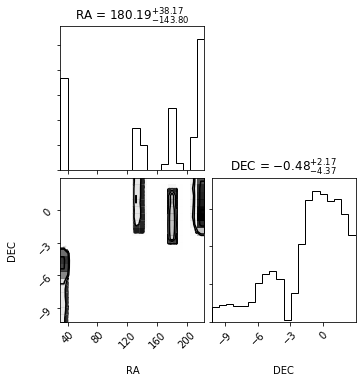

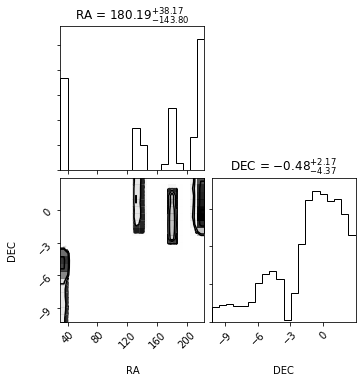

In [5]:
corner.corner(np.array([df['RA'], df['DEC']]).T, labels=['RA', 'DEC'], show_titles=True)

## select and download spectra based on redshift and angular coordinates

GAMA DR3 recommends NQ > 2 for science, and environment has to be done locally for each field in the sky.

In [6]:
RA_bin_ends = [0., 80., 160., 200., 360.]
subsamples, lens = [], []
for i in range(len(RA_bin_ends)-1):
    subsamples.append(df.loc[(df['RA'] >= RA_bin_ends[i]) & (df['RA'] < RA_bin_ends[i+1]) 
                             & (df['NQ'] > 2), ['RA', 'DEC', 'Z', 'NQ', 'URL', 'FILENAME']])
    lens.append(len(subsamples[-1]))

In [7]:
subset = np.argmin(lens)
chosen_ind = subsamples[subset].sample(1, random_state=42).index[0]
# chosen_ind = subsamples[subset].sample(1).index[0]
subsamples[subset].URL[chosen_ind].decode('ascii')

'http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G09_Y1_IS1_370.fit       '

In [8]:
just_url = subsamples[subset].URL[chosen_ind].decode('ascii')
just_fn = subsamples[subset].FILENAME[chosen_ind].decode('ascii')[1:]
os.makedirs(os.path.dirname(just_fn), exist_ok=True)
spectrum = ur.urlretrieve(just_url, just_fn)

In [9]:
with fits.open(just_fn) as hdul:
    arr = np.array(hdul[0].data).byteswap().newbyteorder()
    metadata = hdul[0].header

# Next steps


## download and summarize more spectra!

## choose and implement a measure of "environment"

## multiply spectra by photometric filter transmission curves to get colors

## construct redshift-environment-SED/color relationship

## TBD Question: Is the flux given the restframe? Most likely but I should double check just in case

In [ ]:
## Looking at some stats

gama_c = 0
gamaLT_c = 0
sdss_c = 0
dfgrs2_c = 0
qz_c = 0
slaq_lrg_c = 0
slaq_qso_c = 0
dfgs6_c = 0
mgc_c = 0
vvds_c = 0
wigglez_c = 0


for i, url in enumerate(df['URL']):
    u = url.decode('utf-8')
    if '/sdss/' in u:
        sdss_c += 1
    elif '/gama_LT/' in u:
        gamaLT_c += 1
    elif '/gama/' in u:
        gama_c += 1
    elif '/2dfgrs/' in u:
        dfgrs2_c += 1
    elif '/2qz/' in u:
        qz_c += 1
    elif '/2slaq-lrg/' in u:
        slaq_lrg_c += 1
    elif '/2slaq-qso/' in u:
        slaq_qso_c += 1
    elif '/6dfgs/' in u:
        dfgs6_c += 1
    elif '/mgc/' in u:
        mgc_c += 1
    elif '/vvds/' in u:
        vvds_c += 1 
    elif '/wigglez/' in u:
        wigglez_c += 1 
    else:
        print(u) #, df.iloc[i])

print('\nsdss: ', sdss_c, '\nGAMA, LT: ', gama_c, gamaLT_c, '\n2dfgrs: ', dfgrs2_c, '\n2QZ: ', qz_c,
       '\nslaq_lrg_c', slaq_lrg_c, '\nslaq_qso_c: ', slaq_qso_c, '\ndfgs6_c', dfgs6_c, '\nmgc_c', mgc_c, 
      '\nvvds_c', vvds_c, '\nwigglez_c', wigglez_c)

xxx                                                                                     
xxx                                                                                     
xxx                                                                                     
xxx                                                                                     
xxx                                                                                     
xxx                                                                                     
xxx                                                                                     
xxx                                                                                     
xxx                                                                                     
xxx                                                                                     

sdss:  23228 
GAMA, LT:  133494 15 
2dfgrs:  2075 
2QZ:  157 
slaq_lrg_c 27 
slaq_qso_c:  32 
dfgs6_c 171 
mg

## Download the data  -- compare this to Alex's method above

In [ ]:
## Code to grab the spectra. It's a tad slow

#for i, url in enumerate(df['URL']):                # This will get all objects
for i, row in enumerate(zip(df['URL'].values[0:20], df['FILENAME'].values[0:20])): # This gets the first 20 objects
    url, fn = row
    u = url.decode('utf-8')
    f = '/'.join(fn.decode('utf-8')[1:].split('/')[:-1]) # drop preceding "/" and the file name
    try:
        cmd = 'wget ' + u + '-P ' + f
        os.system(cmd)
    except:
        print(u) ## I do expect at least 10 exceptions because 10 have 'xxx' for urls

# Let's play with some spectra!

Here are the surveys included in the data lists along with the number of spectra from each survey.


1. GAMA : 133494
2. SDSS : 23228 
3. VVDS (VIMOS VLT Deep Survey) : 66

None of these are flux calibrated:
4. GAMA_LT (GAMA Liverpool Telescope) : 15  
5. ^ 2dFGRS (The 2dF Galaxy Redshift Survey) : 2075  
6. ^ 2QZ (2dF QSO Redshift Survey) : 157 
7. 2SLAQ-LRG (2dF-SDSS LRG and QSO (2SLAQ) Luminous Red Galaxy Survey) : 27 
8. 2SLAQ-QSO (2dF-SDSS LRG and QSO (2SLAQ) Luminous Red Galaxy Survey) : 32
9. MGC (Millinium Galaxy Catalog) : 664 
10. WiggleZ : 87
11. 6dFGS (6dF Galaxy Survey) : 171 

^ These are included below even though we probably cannot use them for our analysis.


We have the most spectra from GAMA and SDSS.


## GAMA
These have 1 HDU with 5 rows where:
- ROW1    = 'Spectrum'           / Flux-calibrated spectrum in 10^-17 erg/s/cm^2/A
- ROW2    = 'Error   '           / 1 sigma error spectrum                         
- ROW3    = 'Spectrum_nocalib'   / Spectrum without flux calibration              
- ROW4    = 'Error_nocalib'      / 1 sigma error spectrum (no flux calibration)   
- ROW5    = 'Sky     '           / Sky spectrum (no flux calibration)   (Sky spectra are removed from the science spectrum during calibration)

This information can be found in the headers of the data. 

The flux is reported in units of 10^-17 erg/s/cm^2/A. 

The wavelength can be determined also based on header values. 
It can be described by a simple linear relationship:
- 'CD1_1' = slope
- 'WMIN' = intercept
    
    lambda = slope * x + intercept
    
   where x =  0,..N, where N is the total number of pixels and lambda is in Angstroms. 

In [ ]:
## Open a file from GAMA 
# use only the first HDU that contains the spectrum 

f = df['FILENAME'].values[0].decode('utf-8')[1:].strip()
print(f)
gama_hdu = fits.open(f)
gama_fits = gama_hdu[0]

In [ ]:
gama_hdu.info()

In [ ]:
gama_fits.header

In [ ]:
## Set the wavelengths of the spectra
# Make sure these match the WMIN and WMAX from the headers above

x_gama = np.arange(0, len(gama_fits.data[0]))
wv_gama = gama_fits.header['CD1_1']*x_gama + gama_fits.header['WMIN']

print(wv_gama[0], wv_gama[-1])

In [ ]:
## Quick plot of the spectrum plus the variance. 
# Turn on the the other plotting functions to see what non-calibrated spectra look like. 

plt.figure(figsize=(15, 6))

plt.plot(wv_gama, gama_fits.data[0], label='Spectrum')
plt.plot(wv_gama, gama_fits.data[1], label=r'$1\sigma$ Error')
#plt.plot(wv_gama, gama_fits.data[2], label='Non-calibrated Spectrum')
#plt.plot(wv_gama, gama_fits.data[3], label=r'$1\sigma$ Error on Non-calibrated Spectrum')
#plt.plot(wv_gama, gama_fits.data[4], label='Sky Spectrum') 

plt.axhline(0, color='k')

#plt.ylim(-10, 30)
plt.xlim(gama_fits.header['WMIN'], gama_fits.header['WMAX'])

plt.title('GAMA Spectrum')
plt.xlabel(r'Wavelength [$\AA$]', size=13)
plt.ylabel(r'Flux  [$10^{-17}$ erg/s/$cm^2/\AA$]', size=13)

## SDSS
These files have 3 fits extensions:
- Primary with 5 dimensions:
    1. ARRAY1  = 'SPECTRUM'           / 10^-17 erg/s/cm^2/A                            
    2. ARRAY2  = 'VARIANCE'                                                            
    3. ARRAY3  = 'SKY     '           / Subtracted sky spectrum                        
    4. ARRAY4  = 'MODEL   '           / Best fit used for classification and redshift  
    5. ARRAY5  = 'WDISP   '           / Wavelength dispersion             
- MASKS
- SPECOBJ
- SPZLINE

We only need the primary HDU. 

The flux is in the same units as in GAMA; however the wavelength is given in log10. 
- 'CDELT1': slope in log10
- 'CRVAL1': intercept in log10

    lambda = 10^(slope * x + intercept)
    
where x =  0,..N, where N is the total number of pixels and lambda is in Angstroms.   

In [ ]:
f = df['FILENAME'].values[8].decode('utf-8')[1:].strip() 
print(f)

sdss_hdu = fits.open(f)
sdss_fits = sdss_hdu[0]

In [ ]:
sdss_hdu.info()

In [ ]:
sdss_fits.header

In [ ]:
x_sdss = np.arange(0, len(sdss_fits.data[0]))
wv_sdss_log = sdss_fits.header['CRVAL1'] + sdss_fits.header['CDELT1']* x_sdss
wv_sdss = 10**(wv_sdss_log)

print(wv_sdss[0], wv_sdss[-1])

In [ ]:
plt.figure(figsize=(15, 6))

plt.plot(wv_sdss, sdss_fits.data[0], label='Spectrum')
plt.plot(wv_sdss, sdss_fits.data[1], label='Variance')
#plt.plot(wv_sdss, sdss_fits.data[2], label='Sky Spectrum')
#plt.plot(wv_sdss, sdss_fits.data[3], label='Best fit model')
#plt.plot(wv_sdss, sdss_fits.data[5], label='Wavelenght dispersion')

plt.axhline(0, color='k')

plt.legend()

plt.xlim(sdss_fits.header['WMIN'], sdss_fits.header['WMAX'])

plt.title('SDSS Spectrum')
plt.xlabel(r'Wavelength [$\AA$]', size=13)
plt.ylabel(r'Flux  [$10^{-17}$ erg/s/$cm^2/\AA$]', size=13)

## VVDS
There is 1 HDU with 3 elements
- ROW1    = 'SPECTRUM'                                                            
- ROW2    = 'ERROR   '                                                            
- ROW3    = 'SKY     '   

These spectra ARE FLUX CALIBRATED, but they are not divided by 10^17 like the other 2. 
Linear wavelength, Converted the flux to be to be same units as GAMA and SDSS.

In [ ]:
# look for a file to download
for i, s in enumerate(df['SURVEY']):
    survey = s.decode('utf-8')
    if 'VVDS' in survey:
        print(survey, i)
        break

In [ ]:
# Note: you can view the object here http://www.gama-survey.org/dr3/tools/sov.php once you get its CATID
df.iloc[137087]

In [ ]:
cmd = 'wget ' + df.iloc[137087]['URL'].decode('utf-8') + '-P ' \
       + '/'.join(df.iloc[137087]['FILENAME'].decode('utf-8')[1:].split('/')[:-1])

os.system(cmd)


In [ ]:
f = df['FILENAME'].values[137087].decode('utf-8')[1:].strip() 
print(f)

vvds_hdu = fits.open(f)
vvds_fits = vvds_hdu[0]

In [ ]:
vvds_hdu.info()

In [ ]:
vvds_fits.header

In [ ]:
x_vvds = np.arange(0, len(vvds_fits.data[0]))
wv_vvds = vvds_fits.header['CDELT1']*x_vvds + vvds_fits.header['WMIN']

print(wv_vvds[0], wv_vvds[-1])

In [ ]:
plt.figure(figsize=(15, 6))

plt.plot(wv_vvds, vvds_fits.data[0]/1e-17, label='Spectrum')
plt.plot(wv_vvds, vvds_fits.data[1]/1e-17, label='Error')
#plt.plot(wv_sdss, sdss_fits.data[2], label='Sky Spectrum')

plt.axhline(0, color='k')

plt.legend()

plt.xlim(vvds_fits.header['WMIN'], vvds_fits.header['WMAX'])

plt.title('VVDS Spectrum')
plt.xlabel(r'Wavelength [$\AA$]', size=13)
plt.ylabel(r'Flux  [$10^{-17}$ erg/s/$cm^2/\AA$]', size=13)

## 2dFGRS
These have 1 HDU with 3 rows where:
- ROW1    = 'SPECTRUM'                                                            
- ROW2    = 'VARIANCE'                                                            
- ROW3    = 'SKY     '    

Wavelength is the normal linear solution.

The spectrum is given in arbitrary flux units. *The 2dFGRS spectra are not flux-calibrated.*

Some of these objects have photometry from SDSS though. 
Because these are not flux calibrated, we cannot use them, but I include it here as an example.

In [ ]:
# I did not download a 2dFGRS spectrum in the first 20 entries, so I need to find one to download
for i, s in enumerate(df['SURVEY']):
    survey = s.decode('utf-8')
    if '2dFGRS' in survey:
        print(survey, i)
        break

In [ ]:
df.iloc[153]

In [ ]:
cmd = 'wget ' + df.iloc[153]['URL'].decode('utf-8') + '-P ' \
       + '/'.join(df.iloc[153]['FILENAME'].decode('utf-8')[1:].split('/')[:-1])

    
os.system(cmd)

In [ ]:
f = df['FILENAME'].values[153].decode('utf-8')[1:].strip()
print(f)

dfgrs2_hdu = fits.open(f)
dfgrs2_fits = dfgrs2_hdu[0]

In [ ]:
dfgrs2_hdu.info()

In [ ]:
dfgrs2_fits.header

In [ ]:
x_dfgrs2 = np.arange(0, len(dfgrs2_fits.data[0]))
wv_dfgrs2 = dfgrs2_fits.header['CDELT1']*x_dfgrs2 + dfgrs2_fits.header['WMIN']

print(wv_dfgrs2[0], wv_dfgrs2[-1])

In [ ]:
plt.figure(figsize=(15, 6))

plt.plot(wv_dfgrs2, dfgrs2_fits.data[0], label='Spectrum')
#plt.plot(wv_dfgrs2, dfgrs2_fits.data[1], label='Variance')
#plt.plot(wv_dfgrs2, dfgrs2_fits.data[2], label='Sky Spectrum')


plt.axhline(0, color='k')

plt.legend()

plt.xlim(dfgrs2_fits.header['WMIN'], dfgrs2_fits.header['WMAX'])
plt.ylim(-20, 400)

plt.title('2dFGRS Spectrum')
plt.xlabel(r'Wavelength [$\AA$]', size=13)
plt.ylabel('Flux [Arbitrary Units]', size=13)

## 2QZ
Three HDUs
- Primary (spectrum)
- Bad pixel masks
- Variance 

Normal linear wavelenght solution.

Spectra are not given in flux units and so can be converted via BZERO and BSCALE headers
    True_value = BSCALE * FITS_value + BZERO 
   
Because these are not flux calibrated, we cannot use them, but I include it here as an example.

In [ ]:
for i, s in enumerate(df['SURVEY']):
    survey = s.decode('utf-8')
    if '2QZ' in survey:
        print(survey, i)
        break

In [ ]:
df.iloc[16825]

In [ ]:
cmd = 'wget ' + df.iloc[16825]['URL'].decode('utf-8') + '-P ' \
       + '/'.join(df.iloc[16825]['FILENAME'].decode('utf-8')[1:].split('/')[:-1])

os.system(cmd)

In [ ]:
## Open these the same as the others.
# However, the variance is split into a different HDU instead of being another array in the Primary HDU

f = df['FILENAME'].values[16825].decode('utf-8')[1:].strip()
print(f)

qz_hdu = fits.open(f)
qz_fits = qz_hdu[0]
qz_var = qz_hdu[2]   ## variance HDU

In [ ]:
qz_hdu.info()

In [ ]:
qz_fits.header

In [ ]:
qz_var.header

In [ ]:
x_qz = np.arange(0, len(qz_fits.data))
wv_qz = qz_fits.header['CD1_1']*x_qz + qz_fits.header['WMIN']

print(wv_qz[0], wv_qz[-1])

In [ ]:
### On GAMAs single object viewer, they do not do this conversion

## convert data to physical units
## the headers are sometimes not there??
#qz_data_array = qz_fits.header['BSCALE'] * qz_fits.data + qz_fits.header['BZERO']
#qz_var_array = qz_var.header['BSCALE'] * qz_var.data + qz_var.header['BZERO']

#spec_slope = qz_fits.header['BSCALE']
#spec_inter = qz_fits.header['BZERO']
#var_slope = qz_var.header['BSCALE']
#var_inter = qz_var.header['BZERO']

#qz_data_array = spec_slope * qz_fits.data + spec_inter
#qz_var_array = var_slope * qz_var.data +var_inter

# For some reason this strips the BZERO and BSCALE keywords from the headers

In [ ]:
plt.figure(figsize=(15, 6))

plt.plot(wv_qz, qz_fits.data, label='Spectrum')
#plt.plot(wv_qz, qz_var.data, label='Variance')



#plt.axhline(0, color='k')

plt.legend()

plt.xlim(qz_fits.header['WMIN'], qz_fits.header['WMAX'])
#plt.ylim(-20, 400)

plt.title('2QZ Spectrum')
plt.xlabel(r'Wavelength [$\AA$]', size=13)
plt.ylabel('Flux [Arbitrary Units]', size=13)

# Getting photometry from spectra

In [ ]:
## this is mostly an SNCOSMO code that I updated to be able to return spectra
#from sncosmo_spectrum import Spectrum as sncosmo_Spec ## My error code is not working
# This will give you photometry but not the error on photometry right now
#import sncosmo

def photometry(wavelength, spectrum, band, magnitudes=True, magsystem='ab', **kwargs):
    '''
        band: Check sncosmo for list of bands
        magsystem: Check sncosmo for list of magsystems
    '''
    # Define a spectrum object
    spectrum = sncosmo.Spectrum(wavelength, spectrum) #, error=variance)

    ## Something to add new filters
    ### build into SNCosmo: Bessel, SNLS, DES, SDSS, HST ACS WFC, WFC3 IR,
    ### WFC2 UVIS, Kepler, CSP, JWST NIRCAM/MIRI (nah), LSST, keplercam, 4shooter
    ### This actually may need to be built somewhere else

    # Calculate flux and flux error in specific band
    flux = spectrum.bandflux(band)

    # MagSystem
    mag = sncosmo.get_magsystem(magsystem)
    
    # Calculate magnitudes and mag errors from flux
    magn = mag.band_flux_to_mag(flux, band)
    #magerr = 2.5/np.log(10) * fluxerr / flux

    if magnitudes:
        return magn 
    else:
        return flux 

In [ ]:
## This cell creates an array of zeros of size (N spectra, M bandpasses).
# Here we can set some limits if we want so that we don't open everything, but we can choose to do this later
# right now it opens everything but I included the df keywords for probability the redshift is right ('PROB') and 
# the 'NQ' which should be larger than 2 based off the GAMA header
# once everything is read in, I clean the data of NANs and then generate the photometry.

header_keyword_dict = {'GAMA': 'CD1_1', 'SDSS': 'CDELT1', 'VVDS': 'CDELT1'}
bandpasses = ['lsstg', 'lsstr', 'lssti']

phot_measures = np.zeros((len(df[0:20]), len(bandpasses)))

for n, expand in enumerate(df[0:20].iterrows()):
    index, row = expand
    if row['PROB'] > -0.68 and row['NQ'] > 2:
        s = row['SURVEY'].decode('utf-8').strip()
        if s in ['GAMA', 'SDSS', 'VVDS']:
            
            f = row['FILENAME'].decode('utf-8')[1:].strip()
            hdu = fits.open(f)
            spectrum = hdu[0].data[0]
            header_info = hdu[0].header
            
            x = np.arange(0, len(spectrum))
            if s in 'SDSS':
                wv_log = header_info['CRVAL1'] + header_info[header_keyword_dict[s]] * x
                wv = 10**(wv_log)
            else:
                wv = header_info['WMIN'] + header_info[header_keyword_dict[s]] * x
                        
            if s in 'VVDS':
                spectrum = spectrum/1e-17

            # Now I need to clean out the nans from the flux.
            nonan_flux = np.array([x for x in spectrum if not np.isnan(x)])
            
            nonan_wv = []
            for w, f in zip(wv, spectrum):
                if ~np.isnan(f):
                    nonan_wv.append(w)

            for i, b in enumerate(bandpasses):
                try:
                    phot_measures[n, i] = photometry(nonan_wv, nonan_flux*1e-17, b)
                except:
                    continue

            hdu.close()


In [ ]:
## You'll see here a bad pixel in spectrum for iloc=17 causing the g-band to fail to produce photometry
phot_measures

In [ ]:
hdu = fits.open(df.iloc[17]['FILENAME'].decode('utf-8')[1:].strip())
spectrum = hdu[0].data[0]
header_info = hdu[0].header
x = np.arange(0, len(spectrum))
wv = header_info['WMIN'] + header_info['CD1_1'] * x
plt.plot(wv, spectrum)

In [ ]:
## In order to add these to the data frame, 
#I do a deep copy of only the files I downloaded and then added the columns. 
df20 = df.copy()[0:20]

In [ ]:
for i, b in enumerate(bandpasses):
    df20[b] = phot_measures[:, i]

In [ ]:
df20

## Plotting redshifts versus Photometry

In [ ]:
plt.plot(df20['Z'], df20['lsstg'], 'o', alpha=0.5, label='LSSTr')
plt.plot(df20['Z'], df20['lsstr'], 'o', alpha=0.5, label='LSSTr')
plt.plot(df20['Z'], df20['lssti'], 'o', alpha=0.5, label='LSSTi')

plt.ylim(12, 22)
plt.legend()
plt.xlabel('redshift')

In [ ]:
## Color plot

plt.plot(df20['Z'], df20['lsstg']- df20['lsstr'], 'o', alpha=0.5, label='g-r')
plt.plot(df20['Z'], df20['lsstr']- df20['lssti'], 'o', alpha=0.5, label='r-i')
plt.ylim(-1., 2)

plt.legend()
plt.xlabel('redshift')